# Libs and pre-definitions

### Bibliotecas padrões python e utils pytorch

In [9]:
import torch
(torch.tensor([[[1,2,3]],[[1,2,3]]]).size())

torch.Size([2, 1, 3])

In [5]:
import torch
from torchvision import datasets
import torchvision.transforms as transforms
transforms_train = transforms.Compose([
                    transforms.ToTensor(),
                    transforms.RandomCrop(32, padding=4),
                    transforms.RandomHorizontalFlip(),
                    transforms.RandomRotation(15),
                    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])
training_data = datasets.CIFAR10(
            root="data",
            train=True,
            download=True,
            transform=transforms_train)

Files already downloaded and verified


In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import torchvision
from torch import nn
from torch.utils.data import DataLoader, Subset
from torchvision import datasets
import torchvision.transforms as transforms
from torchvision.transforms import ToTensor, Lambda, Compose, Normalize
from collections import defaultdict
from torch.utils.data import random_split
import copy
from random import randrange

In [2]:
# Define o computador utilizado como cuda (gpu) se existir ou cpu caso contrário
print(torch.cuda.is_available())
dev = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

True


### Bibliotecas desenvolvidas

https://github.com/lfpc/Uncertainty_Estimation

In [3]:
import NN_models as models
from NN_models import vgg
import uncertainty.comparison as unc_comp
import uncertainty.quantifications as unc
import uncertainty.losses as losses
import uncertainty.train_and_eval_with_g as TE_g
import NN_utils as utils
import NN_utils.train_and_eval as TE
import cifar_data as cifar

## Data download and transforms

In [4]:
PATH = r'/home/luis-felipe/Uncertainty_Estimation/torch_models'
PATH_trainer = r'/home/luis-felipe/Uncertainty_Estimation/torch_models/trainer'

In [5]:

data_cifar = cifar.Cifar_10_data()
full_train_dataloader = copy.deepcopy(data_cifar.train_dataloader)

data_cifar = cifar.Noisy_CIFAR_10(noise_size = 0.2,noisy_val = True)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


# Train classifier

In [6]:
loss_criterion = nn.NLLLoss()
risk_dict = None#{'selective_risk_mcp':  lambda x,label: unc_comp.selective_risk(x,label,unc_type = unc.MCP_unc)}

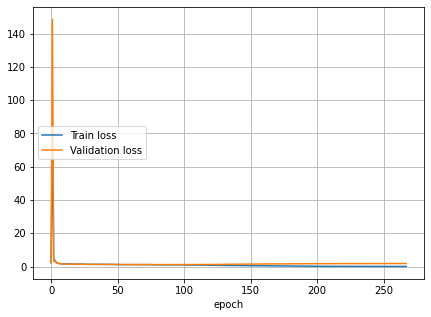

In [ ]:
model_noisy = models.vgg.VGG_16(10).to(dev)
optimizer = torch.optim.SGD(model_noisy.parameters(), lr=0.1,momentum = 0.9,weight_decay = 5e-4, nesterov = True)

model_trainer_noisy = TE.Trainer(model_noisy,optimizer,loss_criterion, data_cifar.train_dataloader,data_cifar.validation_dataloader,c=0.8,update_lr = (25,2),risk_dict = risk_dict)
model_trainer_noisy.fit(data_cifar.train_dataloader,500)
#model_trainer.save_all(PATH, PATH_trainer)

acc = TE.model_acc(model_noisy,full_train_dataloader)
print('Conjunto de treinamento: acc = ', acc)
acc = TE.model_acc(model_noisy,data_cifar.get_clean_subset())
print('Conjunto de treinamento só limpo: acc = ', acc)
acc = TE.model_acc(model_noisy,data_cifar.train_dataloader)
print('Conjunto de treinamento sujo: acc = ', acc)
acc = TE.model_acc(model_noisy,data_cifar.test_dataloader)
print('Conjunto de teste: acc = ', acc)

In [ ]:
model_clean = models.vgg.VGG_16(10).to(dev)
optimizer = torch.optim.SGD(model_clean.parameters(), lr=0.1,momentum = 0.9,weight_decay = 5e-4, nesterov = True)

model_trainer_clean = TE.Trainer(model_clean,optimizer,loss_criterion, data_cifar.train_dataloader,data_cifar.validation_dataloader,c=0.8,update_lr = (25,2),risk_dict = risk_dict)
model_trainer_clean.fit(data_cifar.get_clean_subset(),500)
#model_trainer.save_all(PATH, PATH_trainer)

acc = TE.model_acc(model_clean,full_train_dataloader)
print('Conjunto de treinamento: acc = ', acc)
acc = TE.model_acc(model_clean,data_cifar.get_clean_subset())
print('Conjunto de treinamento só limpo: acc = ', acc)
acc = TE.model_acc(model_clean,data_cifar.train_dataloader)
print('Conjunto de treinamento sujo: acc = ', acc)
acc = TE.model_acc(model_clean,data_cifar.test_dataloader)
print('Conjunto de teste: acc = ', acc)

In [ ]:
model = models.vgg.VGG_16(10).to(dev)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1,momentum = 0.9,weight_decay = 5e-4, nesterov = True)

model_trainer = TE.Trainer(model,optimizer,loss_criterion, data_cifar.train_dataloader,data_cifar.validation_dataloader,c=0.8,update_lr = (25,2),risk_dict = risk_dict)
model_trainer.fit(train_dataloader,500)
#model_trainer.save_all(PATH, PATH_trainer)

acc = TE.model_acc(model,full_train_dataloader)
print('Conjunto de treinamento: acc = ', acc)
acc = TE.model_acc(model,data_cifar.get_clean_subset())
print('Conjunto de treinamento só limpo: acc = ', acc)
acc = TE.model_acc(model,data_cifar.train_dataloader)
print('Conjunto de treinamento sujo: acc = ', acc)
acc = TE.model_acc(model,data_cifar.test_dataloader)
print('Conjunto de teste: acc = ', acc)

In [ ]:
len(train_dataloader.dataset)

In [ ]:
len(clean_data.dataset)

In [ ]:
len(noisy_data.dataset)

In [ ]:
isinstance(test_dataloader.dataset,torch.utils.data.Dataset)